<a href="https://colab.research.google.com/github/Adarsh0027/BA01/blob/main/09_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
count=len(dataset)
print(count)
dataset.isnull().sum()

891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print('median of age column %2f'%(dataset['Age'].median(skipna=True)))
print('percent of missing records in the cabin column:%2f %%'%(dataset['Cabin'].isnull().sum()/len(dataset)*100))
print('common boarding most of embarkation:%s'%dataset['Embarked'].value_counts().idxmax())

median of age column 28.000000
percent of missing records in the cabin column:77.104377 %
common boarding most of embarkation:S


In [6]:
dataset['Age'].fillna(dataset['Age'].median(skipna=True),inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].value_counts().idxmax(),inplace=True)

In [7]:
dataset.drop("Cabin",axis=1,inplace=True)
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
dataset['Travel alone']=np.where((dataset['SibSp']+dataset['Parch'])>0,0,1)
dataset.drop('SibSp',axis=1,inplace=True)
dataset.drop('Parch',axis=1,inplace=True)

In [9]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic (2).csv


In [10]:
dataset.drop('PassengerId',axis=1,inplace=True)
dataset.drop('Name',axis=1,inplace=True)
dataset.drop('Ticket',axis=1,inplace=True)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


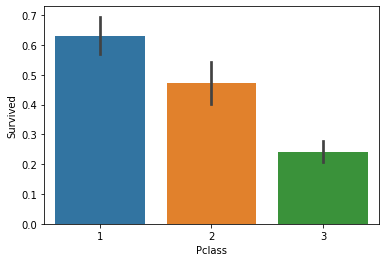

In [11]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

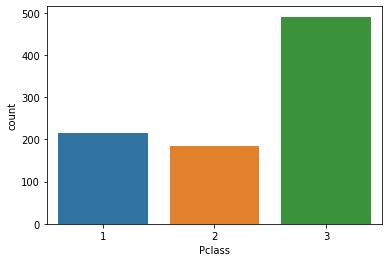

In [12]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

In [13]:
#setting the values for dependent and independent variables
x= dataset.drop('Survived', 1)
y= dataset.Survived


#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =2 )


<ipython-input-13-b7dc89d74b2c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x= dataset.drop('Survived', 1)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      577
female    314
Name: Sex, dtype: int64

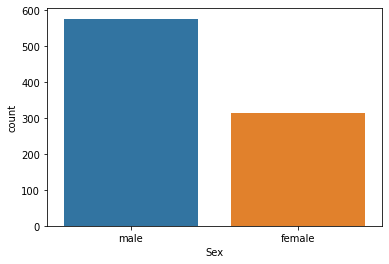

In [14]:
sns.countplot("Sex",data=dataset)
dataset["Sex"].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


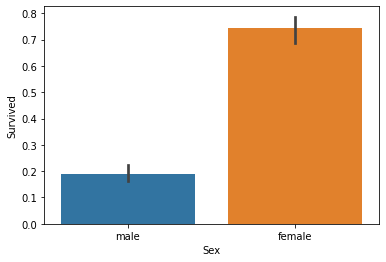

In [15]:
sns.barplot(x="Sex",y="Survived",data=dataset)
dataset.groupby("Sex",as_index=False).Survived.mean()

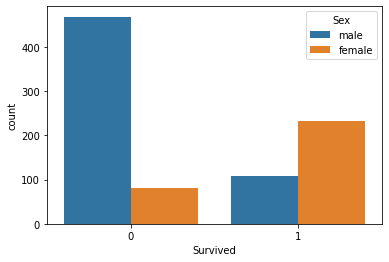

In [16]:
sns.countplot(x="Survived",hue="Sex",data=dataset)

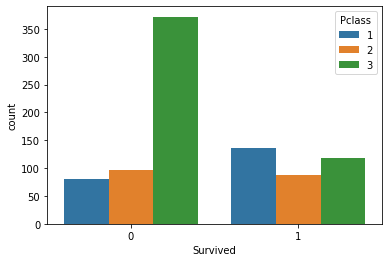

In [17]:
sns.countplot(x="Survived",hue="Pclass",data=dataset)


S    646
C    168
Q     77
Name: Embarked, dtype: int64

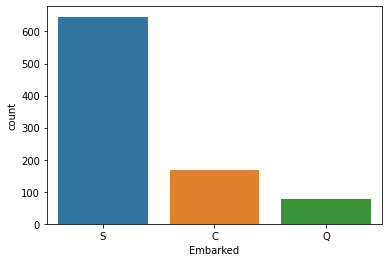

In [18]:
sns.countplot(x="Embarked",data=dataset)
dataset["Embarked"].value_counts()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


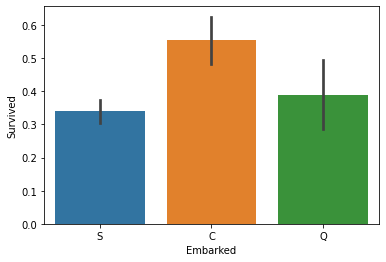

In [19]:
sns.barplot(x='Embarked',y='Survived',data=dataset)
dataset.groupby('Embarked',as_index=False).Survived.mean()

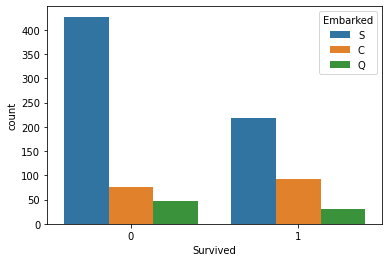

In [20]:
sns.countplot(x="Survived",hue="Embarked",data=dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    537
0    354
Name: Travel alone, dtype: int64

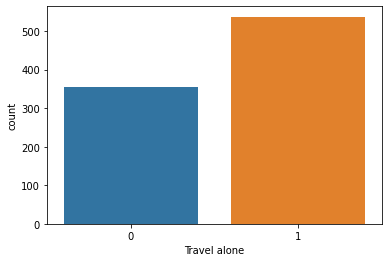

In [21]:
sns.countplot("Travel alone",data=dataset)
dataset["Travel alone"].value_counts()

In [22]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


,Travel alone,Survived
0,0,0.505650
1,1,0.303538


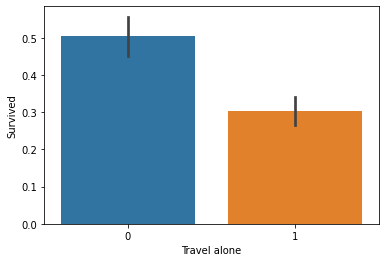

In [23]:
sns.barplot(x="Travel alone",y="Survived",data=dataset)
dataset.groupby("Travel alone",as_index=False).Survived.mean()

In [24]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['Sex']=label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']=label_encoder.fit_transform(dataset['Embarked'])

In [25]:
X=dataset.drop("Survived",1)
y=dataset.Survived

<ipython-input-25-60666f5f4b4f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=dataset.drop("Survived",1)


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [27]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=lr_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy of the mode:",(accuracy_score(y_test,y_pred)*100))

Accuracy of the mode: 78.73134328358209


In [30]:
a=pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred})
a.head()

,Actual value,Predicted value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       160
           1       0.77      0.67      0.72       108

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



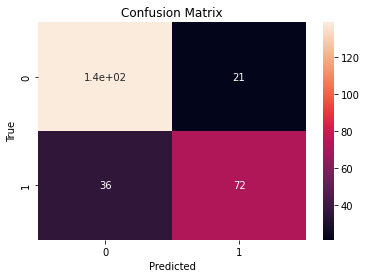

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

matrix=confusion_matrix(y_test,y_pred)

sns.heatmap(matrix,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test, y_pred))